
# Project: Data Analysis on Medical Appointment Absence

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I analyzed a dataset comprising the characters of patients who showed up or not for their medical appointments. 

Specifically, I explored this dataset to answer following questions:
<ul>
<li><a href="#question1">What's the relationship of physical conditions (gender, age, and disability) of patients and their absence ratio?</a></li>
<li><a href="#question2">What's the relationship of interval time (between schedule day and appointment day) and the absence ratio fo patients?</a></li>
<li><a href="#question3">What's the relationship of SMS notification and the absence ratio of patients?</a></li>
</ul>

The answers to these questions will highlight the important factors helping us to understand whether or not a patient will be absent for medical appointment.

In [117]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make the figures embed in the notebook
%matplotlib inline

Setting to show the full dataset when called

In [118]:
#pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None) 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [119]:
# load dataset
df = pd.read_csv('no_show_appointments.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no NaN values in any column.

In [83]:
sum(df.duplicated())

0

There is no duplicated rows.

In [112]:
df.query('Age < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,IntervalDay
99832,465943158731293.0,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0,0


In [120]:
index = df.query('Age < 0').index
df.drop(index, inplace=True)

Remove the record that the age of patient is negative.

Check the result

In [131]:
df.query('Age < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,IntervalDay


### Modify column names

To make the column names in a consistant format, and easy to interpret:

In [121]:
correction = {'PatientId': 'PatientID', 'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'Absence'}
df.rename(columns=correction, inplace=True)


### Modify data types

##### Convert `PatientId` from `float` to `string`

##### Convert `AppointmentID` from `int` to `string` 

In [122]:
df['PatientID'] = df['PatientID'].astype('str')
df['AppointmentID'] = df['AppointmentID'].astype('str')

##### Convert `ScheduledDay` and `AppointmentDay` to `datetime` , then calculate their intervals

Replace character "T" and "Z" with blank

In [124]:
def replace_blank(column, rep):
    df[column] = df[column].str.replace(rep, ' ')

In [125]:
replace_blank('ScheduledDay', 'Z')
replace_blank('ScheduledDay', 'T')
replace_blank('AppointmentDay', 'Z')
replace_blank('AppointmentDay', 'T')

Because `AppointmentDay` only provides date information, I'll remove the time part in both columns to make them consistent.

In [126]:
df['ScheduledDay'] = df['ScheduledDay'].str.split(expand = True)
df['AppointmentDay'] = df['AppointmentDay'].str.split(expand=True)

df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

Create a new column `Interval` to represent the number of days patients schedule the appointment in advance.

In [127]:
df['IntervalDay'] = df['AppointmentDay']-df['ScheduledDay']
df['IntervalDay'] = df['IntervalDay'].astype(str).str[:2]
df['IntervalDay'] = pd.to_numeric(df['IntervalDay'])

Check whether all the intervals are positive

In [128]:
df.query('IntervalDay < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,IntervalDay
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


There are five unusual records: the date making appointment is later than the actual appointment date. 
I'll drop these rows.

In [129]:
index = df.query('IntervalDay < 0').index
df.drop(index, inplace=True)

Check the result:

In [130]:
df.query('IntervalDay < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,IntervalDay


##### Convert `Absence` from string to int (0, 1)

Using (0, 1) instead of (Yes, No) help us to calculate the absence ratio.

In [132]:
df['Absence'] = df['Absence'].map({'Yes': 1, 'No': 0})

Finally, check the dataframe and datatypes

In [133]:
df

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,IntervalDay
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,35
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,35
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,41
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,41


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110521 non-null  object        
 1   AppointmentID   110521 non-null  object        
 2   Gender          110521 non-null  object        
 3   ScheduledDay    110521 non-null  datetime64[ns]
 4   AppointmentDay  110521 non-null  datetime64[ns]
 5   Age             110521 non-null  int64         
 6   Neighborhood    110521 non-null  object        
 7   Scholarship     110521 non-null  int64         
 8   Hypertension    110521 non-null  int64         
 9   Diabetes        110521 non-null  int64         
 10  Alcoholism      110521 non-null  int64         
 11  Handicap        110521 non-null  int64         
 12  SMS_received    110521 non-null  int64         
 13  Absence         110521 non-null  int64         
 14  IntervalDay     110521 non-null  int

<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
### The relationship between gender, age and disability condition of patients and their absence for appointment

In [135]:
df_absence = df.query('Absence == 1')
df_presence = df.query('Absence == 0')

#### Gender

In [136]:
df.groupby('Gender').Absence.mean()

Gender
F    0.203115
M    0.199638
Name: Absence, dtype: float64

The absence ratio of female patients was slightly higher than male patients. However, it is unknown that whether this difference is statistical significance.

Then, I generated two sub-datasets that I will use to study gender further.

In [137]:
df_female = df.query('Gender == "F"')
df_male = df.query('Gender == "M"')

#### Age

In [21]:
df.groupby('Absence').Age.mean()

Absence
0    37.790064
1    34.317667
Name: Age, dtype: float64

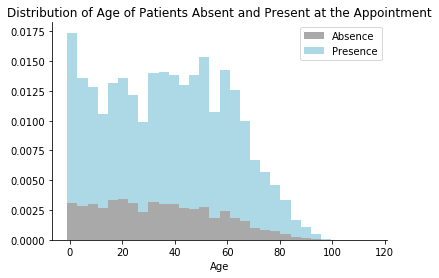

In [115]:
fig, ax = plt.subplots()
plt.hist([df_absence['Age'], df_presence['Age']], bins=30, label=['Absence', 'Presence'], color = ['darkgrey', 'lightblue'], stacked=True, density=True)
plt.title('Distribution of Age of Patients Absent and Present at the Appointment')
plt.xlabel('Age')
plt.legend()
sns.despine();

From these figures, I found that, although the averaged age of patients in the absence group is lower, the distribution in both groups is similar. 

Then, I compared the absence ratio of patients in four age groups: 
    - Kids (0~14 years old)
    - Youth (15~24 years old)
    - Adults (25~64 years old)
    - Seniors (65 years old and over)

In [138]:
Kids_f = df_female.query('Age <= 14')['Absence'].mean()
Youth_f = df_female.query('Age > 15 and Age <= 24')['Absence'].mean()
Adults_f = df_female.query('Age > 25 and Age <= 64')['Absence'].mean()
Seniors_f = df_female.query('Age > 65')['Absence'].mean()
Kids_m = df_male.query('Age <= 14')['Absence'].mean()
Youth_m = df_male.query('Age > 15 and Age <= 24')['Absence'].mean()
Adults_m = df_male.query('Age > 25 and Age <= 64')['Absence'].mean()
Seniors_m = df_male.query('Age > 65')['Absence'].mean()

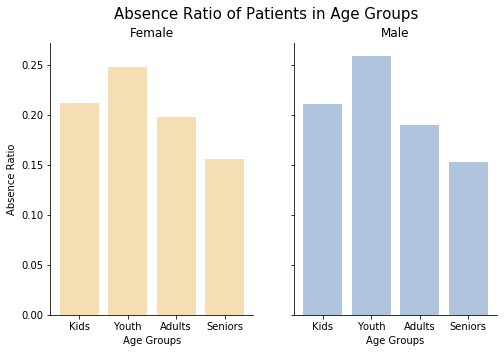

In [139]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8, 5), sharey=True)
sns.despine()
heights_f = [Kids_f, Youth_f, Adults_f, Seniors_f]
heights_m = [Kids_m, Youth_m, Adults_m, Seniors_m]
labels = ['Kids', 'Youth', 'Adults', 'Seniors']

ax1.bar(labels, heights_f, color='wheat')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Absence Ratio')
ax1.set_title('Female')
ax2.bar(labels, heights_m, color='lightsteelblue')
ax2.set_xlabel('Age Groups')
ax2.set_title('Male')

plt.suptitle('Absence Ratio of Patients in Age Groups', fontsize=15);

In both gender, the patients in the youth group (15~24 years old) showed highest absence ratio, while those in the seniors group (65 years old and over) showed lowest absence ratio.

In all age groups, absence ratio is similar in female and male patients.



#### Handicap
Next, I explored the relationship of `Handicap` condition and the absence ratio. `Handicap` refers to the disadvantage and difficulty while disability is defined as a condition. The values in the `Handicap` column correspond to different levels of disability:
    - 0: normal population
    - 1: mild disability
    - 2: moderate disability
    - 3: severe disability
    - 4: profound disability

In [100]:
Handicap = df.groupby('Handicap')['Absence'].mean()
Handicap

Handicap
0    0.202331
1    0.178431
2    0.202186
3    0.230769
4    0.333333
Name: Absence, dtype: float64

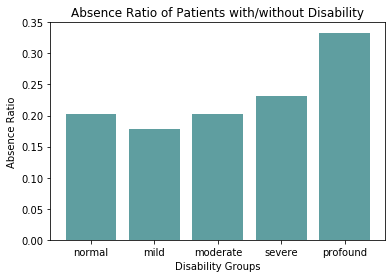

In [104]:
labels = ['normal', 'mild', 'moderate', 'severe', 'profound']
plt.bar(labels, Handicap, color='cadetblue')
plt.title('Absence Ratio of Patients with/without Disability')
plt.ylabel('Absence Ratio')
plt.xlabel('Disability Groups');

This figure indicates the high ratio of absence of the patients with profound disability.

<a id='question2'></a>
### What's the relationship of time between schedule day and appointment day and the absence ratio fo patients?

First, let's compare the average interval time of patients present or absent for the appointment:

In [99]:
interval=df.groupby('Absence')['IntervalDay'].mean()
interval

Absence
0     8.618277
1    15.602985
Name: IntervalDay, dtype: float64

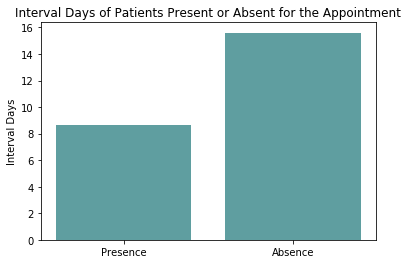

In [101]:
plt.bar(['Presence', 'Absence'], interval, color='cadetblue')
plt.title('Interval Days of Patients Present or Absent for the Appointment')
plt.ylabel('Interval Days');

Compared with patients who showed up, the `IntervalDay` of patients who are absent is much longer, almost double the length.

<a id='question3'></a>
### What's the relationship of  SMS notification and the absence ratio of patients?

In [106]:
sms = df.groupby('SMS_received')['Absence'].mean()
sms

SMS_received
0    0.166978
1    0.275745
Name: Absence, dtype: float64

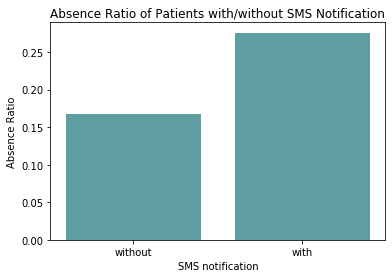

In [107]:
plt.bar(['without', 'with'], sms, color='cadetblue')
plt.title('Absence Ratio of Patients with/without SMS Notification')
plt.ylabel('Absence Ratio')
plt.xlabel('SMS notification');

The absence ratio of patients received SMS notification is higher.

<a id='conclusions'></a>
## Conclusions

After exploring the dataset, I found that age, disbility condition, and interval time between schedule day and appointment day are useful, to some extent, to predict whether or not the patients would show up for the appointment. Specifically, patients from 15 to 24 years old showed higher absence ratio. Patients with profound disability also havd high absence ratio. Patients who were absent on the appointment usually have interval time as long as 15 days. Of note, these analysis are not based on statistical studies, that is, these difference may not be statistical significance. Future statistical analysis is required to validate these factors in predicting the presence or absence of patients for their appointments.